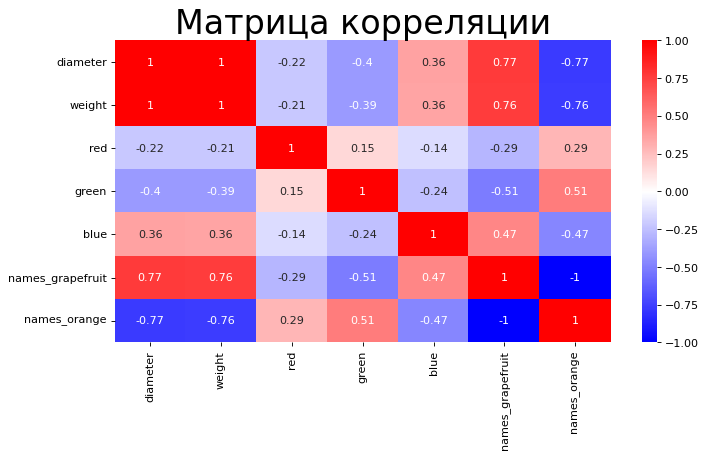

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
Data_f = pd.read_csv("/content/drive/MyDrive/citrus.csv")
# Data_f.loc[(Data_f["name"] == "orange"), ('name')] = 0
# Data_f.loc[(Data_f["name"] == "grapefruit"), ('name')] = 1
Data_f = pd.get_dummies(Data_f, ['names'])
plt.figure(figsize=(10,5), dpi= 80)
sns.heatmap(Data_f.corr(), xticklabels=Data_f.corr().columns, yticklabels=Data_f.corr().columns, cmap='bwr', center=0, annot=True)
plt.title('Матрица корреляции', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
#все признаки корреллируют друг с другом

In [54]:
print(Data_f.shape)
print(Data_f.isna().sum())
print(Data_f.dtypes)

(10000, 6)
name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64
name         object
diameter    float64
weight      float64
red           int64
green         int64
blue          int64
dtype: object


In [61]:
from sklearn.model_selection import train_test_split
x=Data_f.drop(columns=["names_orange","names_grapefruit"])
y=Data_f["names_orange"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [68]:
w0 = model.intercept_[0]
w1 = model.coef_[0]
result=""
result+=str(w0)
names=list(Data_f.columns)
names.pop()
for i in range(len(w1)):
  result+=" +"+" "+str(w1[i])+"*"+str(names[i])
result
#наиболее значимым оказался вес фрукта, наименее значимыми параметрами оказались цвета

'-13.154680619305749 + -13.609545999394392*diameter + 0.7710352432856615*weight + 0.05165971698637415*red + 0.10125482000228164*green + -0.11335008008847042*blue'

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
confusion_matrix(y_test, pred)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print("accuracy: "+str((tp+tn)/(tp+tn+fp+fn)))
print("recall: "+str((tp)/(tp+fn)))
print("precision: "+str((tp)/(tp+fp)))
print("f1:score: "+str(2*(((tp)/(tp+fp))*((tp)/(tp+fn)))/(((tp)/(tp+fp))+((tp)/(tp+fn)))))
#Модель обучена хорошо (высокая общая точность,высокая точность,высокая полнота)

TN: 1494
FP: 43
FN: 81
TP: 1382
accuracy: 0.9586666666666667
recall: 0.9446343130553657
precision: 0.9698245614035088
f1:score: 0.9570637119113574


In [81]:
# accuracy_score(y_test, pred)
# recall_score(y_test, pred)
# precision_score(y_test, pred)
# f1_score(y_test, pred)

0.9570637119113574

In [60]:
Data_f.head()

,diameter,weight,red,green,blue,names_grapefruit,names_orange
0,2.96,86.76,172,85,2,0,1
1,3.91,88.05,166,78,3,0,1
2,4.42,95.17,156,81,2,0,1
3,4.47,95.60,163,81,4,0,1
4,4.48,95.76,161,72,9,0,1
...,...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,1,0
9996,15.41,254.67,148,68,7,1,0
9997,15.59,256.50,168,82,20,1,0
9998,15.92,260.14,142,72,11,1,0


In [37]:
Data_f = pd.read_csv("/content/drive/MyDrive/citrus.csv")
Data_f.loc[(Data_f["name"] == "orange"), ('name')] = 0
Data_f.loc[(Data_f["name"] == "grapefruit"), ('name')] = 1